In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
#load and process data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0# to extract feature quality pf image

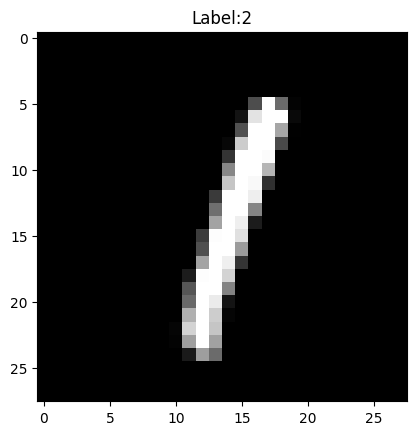

In [ ]:
plt.imshow(x_test[5],cmap="gray")#layers dense sequential
plt.title(f"Label:{y_train[25]}")
plt.show()


In [ ]:
#build the model
model=Sequential([
    Input(shape=(28,28)),#DEFINE THE INPUT SHAPE EXPL
    Flatten(),#NO NEED TO PASS INPUT_SHAPE
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
#COMPILE THE MODEL
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#train the model
model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9957 - loss: 0.0138 - val_accuracy: 0.9737 - val_loss: 0.1074
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9953 - loss: 0.0133 - val_accuracy: 0.9759 - val_loss: 0.1059
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9981 - loss: 0.0072 - val_accuracy: 0.9750 - val_loss: 0.1060
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9973 - loss: 0.0078 - val_accuracy: 0.9752 - val_loss: 0.1064
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9969 - loss: 0.0095 - val_accuracy: 0.9732 - val_loss: 0.1190


In [ ]:
#evaluate the model
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9734 - loss: 0.1042
Test Accuracy:97.77%


In [ ]:
#MAKE PREDICTIONS to push ur img
predictions=model.predict(x_test)
print(f"Predicted Label:{predictions[0].argmax()},True Label:{y_test[0]}")
#give testing model to mod o/p

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted Label:7,True Label:7


In [ ]:
model.save("neural.keras")#save nod for future purpose

In [ ]:
from PIL import Image
import numpy as np
#load trained mod
newmodel=tf.keras.models.load_model("neural.keras")
#load and preprocess the img
img=Image.open('/content/Screenshot 2024-11-13 111519.png')
img=img.convert('L')#convert to grayscale
img=img.resize((28,28))#resize to 28x28 pixels
img_array=np.array(img)/255.0#normalize
img_array=img_array.reshape(1,28,28,1)#reshape for mod i/p
#make a prediction
predictions=newmodel.predict(img_array)
#get predicted label
predicted_label=np.argmax(predictions[0])
print(f"Predicted Label:{predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Label:2
